# Assignment 3
write your names here

In [12]:
import numpy as np

In [13]:
def linear_pca(X, k):
    mu=np.mean(X,axis=1)
    X_c=X-np.expand_dims(mu,axis=1)
    [U,Sigma,VT]=np.linalg.svd(X_c,full_matrices=False)
    S=np.expand_dims(Sigma[:k],axis=1)*VT[:k,:]
    return S

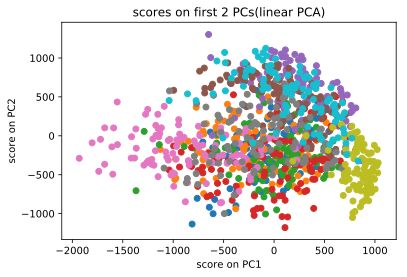

In [14]:
# Insert Code for Subtask 1.1 here
from matplotlib import pyplot as plt
from os import listdir
from scipy.linalg import eigh
import imageio

# Data loader
class MnistLoader:
    def __init__(self, path, maxnumimgs = 100):
        self.dpath = path   
        self.maxnumimgs= maxnumimgs
        self.X = []
        self.labels = []
        self.numimages = [0 for i in range(10)]
        
    def load(self):
        '''
        read image files from disk
        '''
        subdirs = listdir(self.dpath)
        # search through all sub directories
        for subdir in subdirs:
            # list all image files
            imagefiles = listdir('%s/%s'%(self.dpath, subdir))  
            # read images
            nimages = 0
            for f in imagefiles:
                imgvec = np.ravel(imageio.imread('%s/%s/%s'%(self.dpath, subdir, f))).astype('float64')
                
                imglabel = int(f.split('_')[0][-1])
                nimages += 1
                if nimages > self.maxnumimgs:
                    break            
                else:
                    self.X.append(imgvec)
                    self.labels.append(imglabel)
                    self.numimages[imglabel] += 1  
        self.X = np.array(self.X).T
                
    def __str__(self):
        ret_str = '%d images:\n'%sum(self.numimages)
        for i in range(10):
            ret_str += '\t** %d images for number %d\n'%(self.numimages[i], i)
        ret_str += '%d test images:\n'%sum(self.numimages)
        return ret_str

mldr = MnistLoader('./mnist_train/mnist')
mldr.load()
X = mldr.X
npcs = 2

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
S1 = linear_pca(X, npcs)
l_idx = r_idx = 0
for i in range(10):
    r_idx =  l_idx+mldr.numimages[i]-1
    plt.scatter(S1[0,l_idx:r_idx], S1[1, l_idx:r_idx])    
    l_idx +=  mldr.numimages[i]
plt.xlabel('score on PC1')
plt.ylabel('score on PC2')
plt.title('scores on first 2 PCs(linear PCA)')
plt.show()


In [15]:
def gram_pca(K,k):
    # Insert Code for Subtask 1.2 here
    nsamples = np.size(K,axis=1)
    H = np.eye(nsamples) - 1.0/nsamples * np.dot(np.ones((nsamples,1)), np.ones((1,nsamples)))
     
    Ktilde = np.dot( H, np.dot(K, H)) # calculate Ktilde for uncentered data
    [evalue, evec] = eigh(Ktilde,eigvals=(nsamples-k,nsamples-1)) # the k largest eigenvalues
    SigmaK = np.diag(np.sqrt(np.flip(evalue))) # Sigma_k = sqrt(lambda_k), sigular values= sqrt(eigenvalues)
    Vk = np.fliplr(evec) # flip Vk, eigh outputs an ascending order eigenvalue sequence
    
    S = np.dot(SigmaK, Vk.T)
    return S

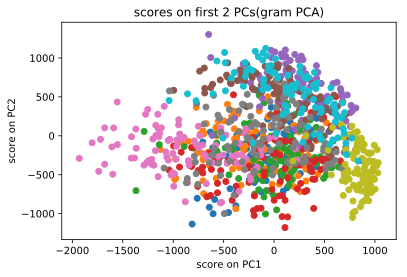

In [16]:
# Insert Code for Subtask 1.3 here
K = np.dot(X.T, X)
S2 = gram_pca(K, npcs)

plt.figure()
l_idx = r_idx = 0
for i in range(10):
    r_idx =  l_idx+mldr.numimages[i]-1
    plt.scatter(S2[0,l_idx:r_idx], S2[1, l_idx:r_idx])    
    l_idx +=  mldr.numimages[i]
plt.xlabel('score on PC1')
plt.ylabel('score on PC2')
plt.title('scores on first 2 PCs(gram PCA)')
plt.show()

In [17]:
def compute_gaussian_gram_matrix(X, sigma):
    #Insert Code for Subtask 1.4 here
    nsamples = np.size(X, axis=1)
    K = np.eye(nsamples)
    for i in range(nsamples):
        for j in range(i, nsamples):
            diff = X[:,i] - X[:,j]
            K[i,j] = K[j,i] =  -np.dot(diff, diff) # np.dot works much faster than np.linalg.norm
    K = K/(2*sigma*sigma)
    K = np.exp(K)
    return K

def gaussian_kernel_pca(X, k, sigma):
    K=compute_gaussian_gram_matrix(X,sigma)
    S=gram_pca(K,k)
    return S

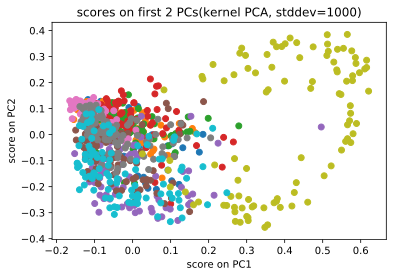

In [11]:
#Insert Code for Subtask 1.5 here
npcs = 2
S3 = gaussian_kernel_pca(X, npcs, 1000)

plt.figure()
l_idx = r_idx = 0
for i in range(10):
    r_idx =  l_idx+mldr.numimages[i]-1
    plt.scatter(S3[0,l_idx:r_idx], S3[1, l_idx:r_idx])    
    l_idx +=  mldr.numimages[i]
plt.xlabel('score on PC1')
plt.ylabel('score on PC2')
plt.title('scores on first 2 PCs(kernel PCA, stddev=1000)')
plt.show()